## Exploring the Dataset (feel free to skip)

데이터 세트 확인하기

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("/content/drive/MyDrive/Kaggle_study/Forest_Cover_Type_Prediction/train.csv")

In [10]:
data.shape

(15120, 56)

In [11]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


사용하지 않는 `id` 삭제

In [12]:
data.drop("Id", axis=1, inplace=True)

라벨로 쓰이는 `Cover_type` 빼내기

In [13]:
x = data.drop("Cover_Type", axis=1)
y = data["Cover_Type"]

In [15]:
x.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

the categoricals and the numericals로 나뉜다.

In [16]:
categoricals = []
numericals = []
for col in x.columns:
    if col[:9]=="Soil_Type" or col[:15]=='Wilderness_Area':
        categoricals.append(col)
    else:
        numericals.append(col)

In [17]:
numericals

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

숫자형 특징들 확인하기

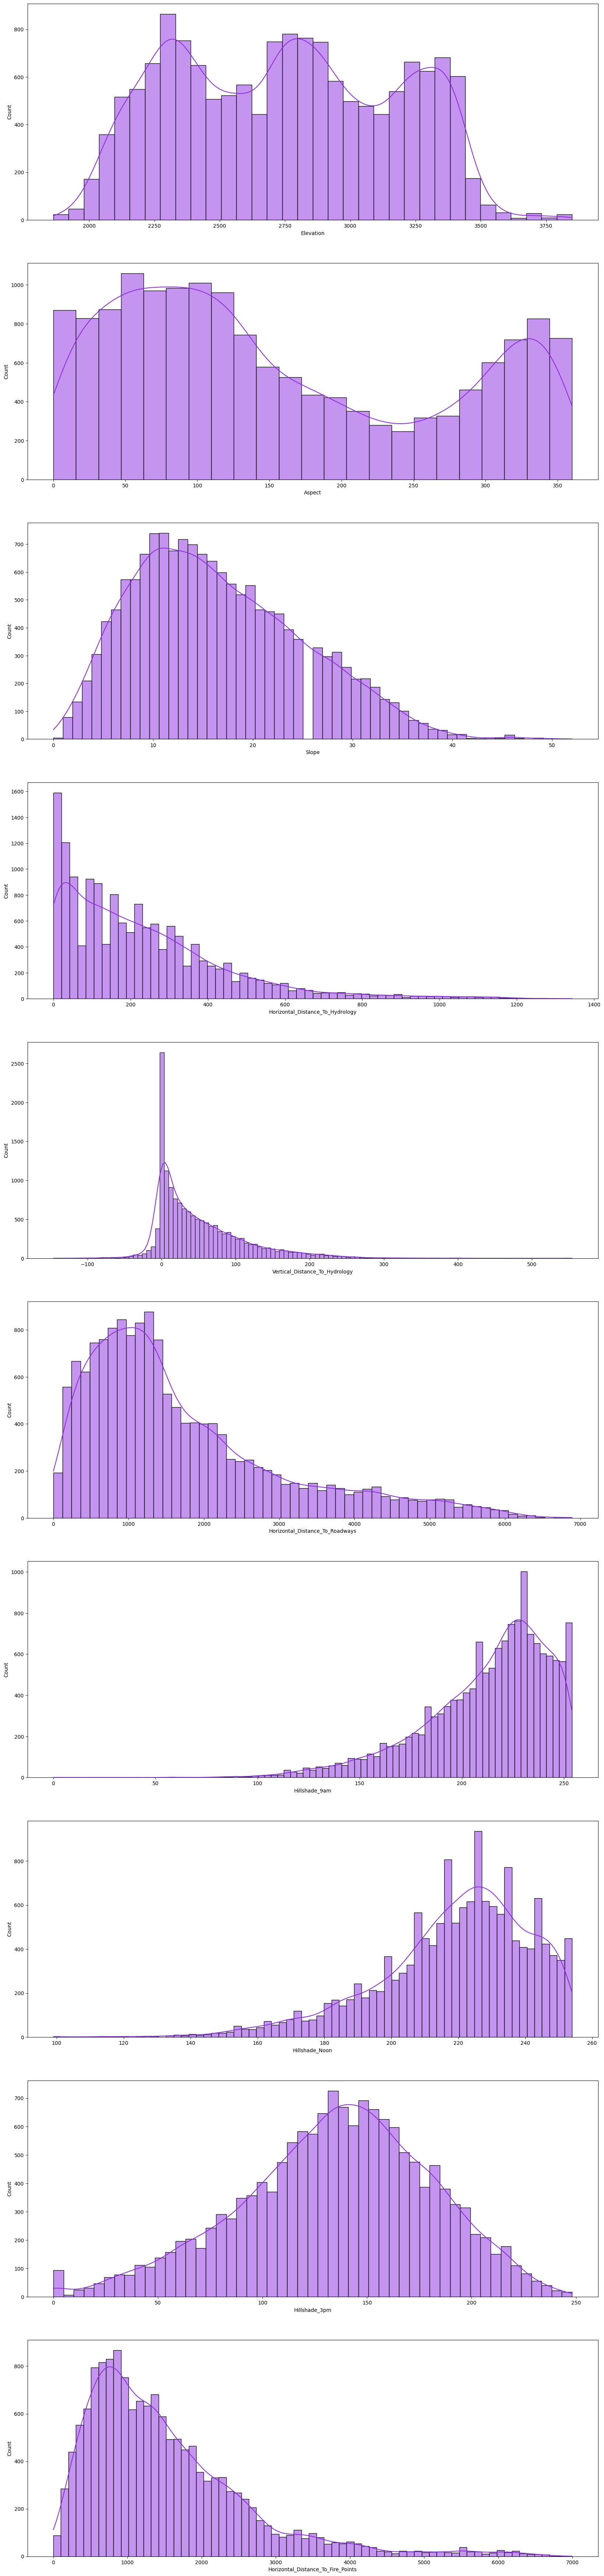

In [18]:
fig, axes = plt.subplots(nrows=len(numericals), ncols=1, figsize=(20, 9*len(numericals)))
for i in range(len(numericals)):
    col = numericals[i]
    sns.histplot(x=col, data=x, ax=axes[i], color="blueviolet", kde=True)
plt.show()

In [19]:
fig, axes = plt.subplots(nrows=len(categoricals), ncols=1, figsize=(20,9*len(categoricals)))
for i in range(len(categoricals)):
    col = categoricals[i]
    sns.countplot(x=col, data=x, ax=axes[i], palette="Set2")
    axes[i].set_yticks(x[col].value_counts())
plt.show()

* 대부분이 0으로 되어있다.
* 토양 유형7번과 15번이 0만 있으므로 삭제한다.

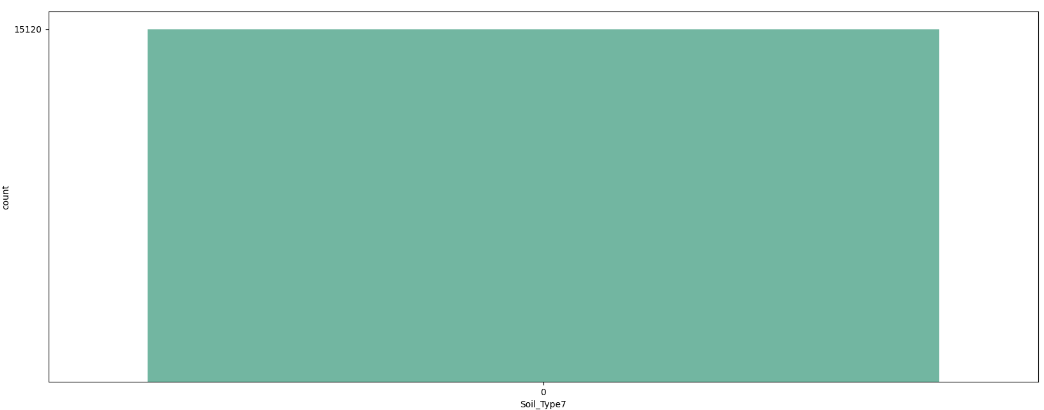

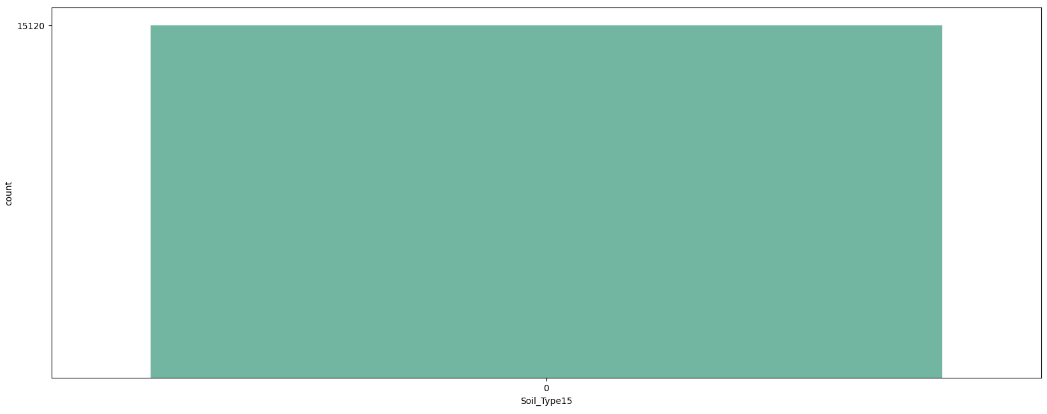

In [20]:
y.value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

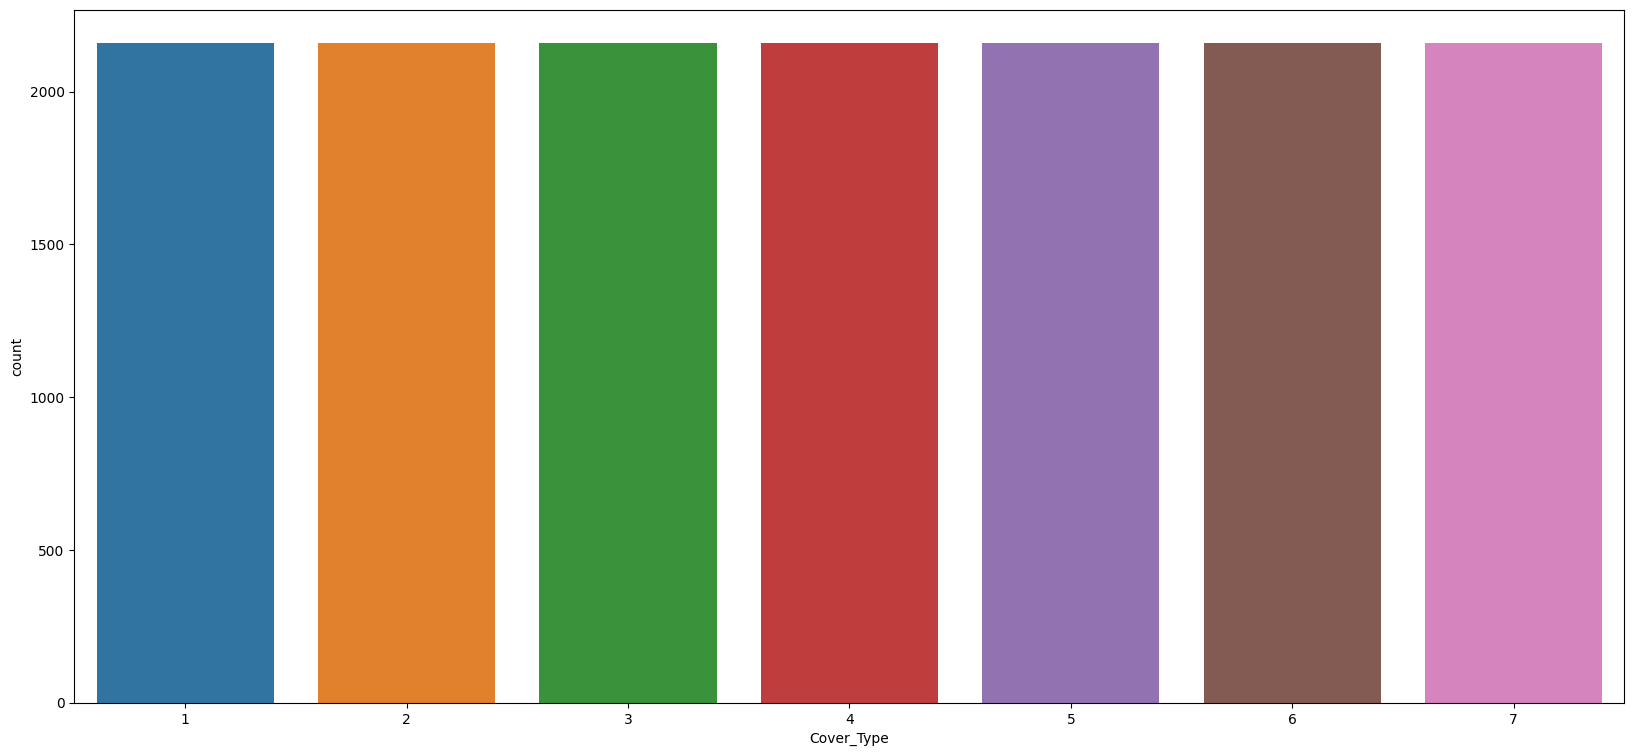

In [37]:
plt.figure(figsize=(20,9))
sns.countplot(x=y)
plt.show()

라벨인 `Cover_Type`은 고르게 분포되어있다.

위에서 모든 데이터가 같은 7번과 15번은 삭제한다.

In [38]:
x.drop(["Soil_Type7", "Soil_Type15"], axis=1, inplace=True)
categoricals.remove("Soil_Type7")
categoricals.remove("Soil_Type15")

## Univariate Outlier Detection

### Numerical Features

z-score을 이용하여 이상값 찾기.
z-score은 "값이 평균에서 얼마나 많은 표준 편차로 떨어져 있습니까?"입니다.

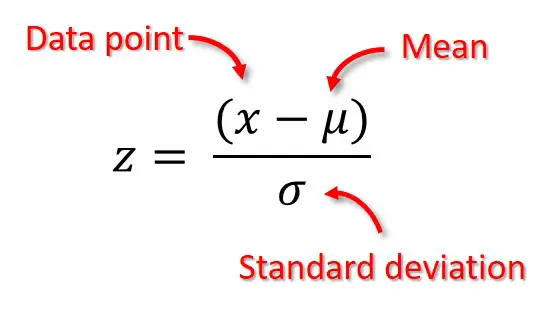

In [39]:
from scipy.stats import zscore

uni_out = x.copy(deep=True)
zs = zscore(uni_out[numericals])

In [40]:
zs

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524
...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545


In [41]:
scores = np.abs(zs)

In [43]:
# 임계값을 3으로 설정
# 3 대신 1을 사용하면 약 600개의 값
non_outlier_indices = (scores<3).all(axis=1)
print(non_outlier_indices)

0        False
1        False
2        False
3        False
4        False
         ...  
15115     True
15116     True
15117     True
15118     True
15119     True
Length: 15120, dtype: bool


## Categorical Features

1의 개수가 100보다 작은것들을 제거함

In [44]:
probably_useless_features = []
for col in categoricals:
    if x[col].value_counts()[0] < 100 or x[col].value_counts()[1] < 100:
        probably_useless_features.append(col)

In [45]:
probably_useless_features

['Soil_Type8',
 'Soil_Type9',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type36',
 'Soil_Type37']

In [46]:
uni_out.drop(probably_useless_features, axis=1, inplace=True)

In [47]:
uni_out

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,1,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,1,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,1,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,0


이진형 범주가 아닌경우는 다음과 같이 진행할 수 있다.

In [48]:
feat = []
for i in range(15120):
    r = np.random.rand()
    if r < 0.25:
        feat.append("value1")
    elif r < 0.53:
        feat.append("value2")
    elif r < 0.85:
        feat.append("value3")
    elif r < 0.99:
        feat.append("value4")
    else:
        feat.append("value5")
feat = pd.Series(feat)

<Axes: ylabel='count'>

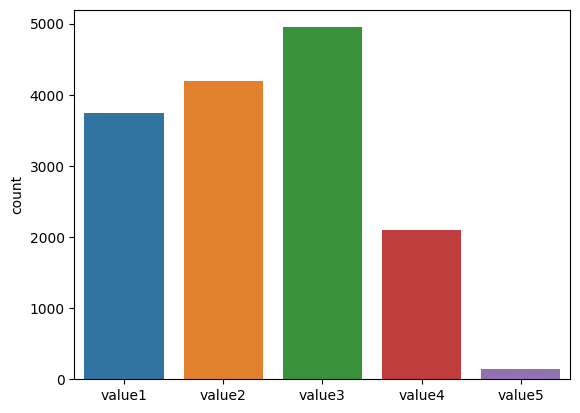

In [49]:
sns.countplot(x=feat)

<Axes: ylabel='count'>

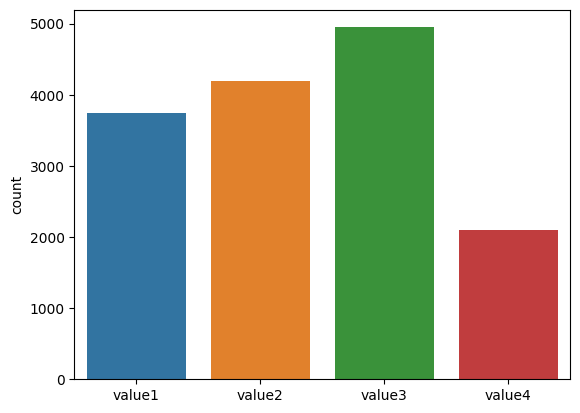

In [50]:
feat = feat[feat!="value5"]
sns.countplot(x=feat)

## Multivariate Outlier Detection with Isolation Forest

아래 그림에서 빨간 점은 이상값이다.

이러한 이상값을 찾는 방법 중 Isolation Forest을 이용한다.

이는 이상값을 자동으로 제거하지 않고 이상값일 가능성에 따라 포인트/관측값의 순위를 매긴다.

![](https://www.intechopen.com/media/chapter/47833/media/image2.jpeg)

In [51]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) # 5%를 제거한다.

In [52]:
iso.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05)

In [53]:
outlier_indices = iso.predict(x)

In [54]:
pd.Series(outlier_indices).value_counts()

 1    14364
-1      756
dtype: int64

756개의 이상값 확인

In [56]:
x[outlier_indices == 1]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,0


## Frequency/Count Encoding

범주형을 숫자로 변환해주기

In [57]:
!pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/1f/e2/495811f12b2e90753fff0e42a07adb0370a725de17cc23a579ac9d3ca67c/category_encoders-2.6.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [58]:
from category_encoders import CountEncoder

위 예시로 든 feat를 숫자형으로 변환

In [59]:
feat

0        value1
1        value1
2        value2
3        value3
4        value2
          ...  
15115    value2
15116    value1
15117    value4
15118    value4
15119    value1
Length: 14979, dtype: object

In [60]:
enc = CountEncoder()
feat_enc = enc.fit_transform(feat)
print(feat_enc)

          0
0      3747
1      3747
2      4191
3      4948
4      4191
...     ...
15115  4191
15116  3747
15117  2093
15118  2093
15119  3747

[14979 rows x 1 columns]


정규화시킬 수 있다.

In [61]:
enc = CountEncoder(normalize=True)
feat_enc = enc.fit_transform(feat)
print(feat_enc)

              0
0      0.250150
1      0.250150
2      0.279792
3      0.330329
4      0.279792
...         ...
15115  0.279792
15116  0.250150
15117  0.139729
15118  0.139729
15119  0.250150

[14979 rows x 1 columns]


## Weight Of Evidence Encoding

[참고](https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html)   

![](https://miro.medium.com/max/768/1*6Aw782wiyiFtzvK7EOY8CA.png)   


증거의 가중치(WOE)는 종속 변수와 관련된 독립 변수의 예측력을 나타냅니다. 이는 신용 평가 세계에서 발전했기 때문에 일반적으로 좋은 고객(Event)과 나쁜 고객(Non Event)을 구분하는 척도로 설명됩니다. '나쁜 고객'은 대출을 불이행한 고객을 의미합니다. 우량고객 이란 대출금을 상환한 고객을 말합니다.

In [62]:
v = pd.DataFrame()
v["Soil_Type10"] = x["Soil_Type10"].map({0:"no", 1:"yes"})
v["Other_feature"] = feat
t = x["Wilderness_Area3"]

In [63]:
v

,Soil_Type10,Other_feature
0,no,value1
1,no,value1
2,no,value2
3,no,value3
4,no,value2
...,...,...
15115,no,value2
15116,no,value1
15117,no,value4
15118,no,value4


In [64]:
from category_encoders import WOEEncoder

In [65]:
enc = WOEEncoder()
enc.fit(v, t)

WOEEncoder(cols=['Soil_Type10', 'Other_feature'])

In [66]:
enc.transform(v)

,Soil_Type10,Other_feature
0,0.075273,0.009506
1,0.075273,0.009506
2,0.075273,-0.022325
3,0.075273,-0.003025
4,0.075273,-0.022325
...,...,...
15115,0.075273,-0.022325
15116,0.075273,0.009506
15117,0.075273,0.049293
15118,0.075273,0.049293


## Scaling Methods

![](https://cdn.kastatic.org/googleusercontent/UPUY_dSWBpH3LM_ujmZAHhiFQdArEwklCUA-wOFSqBRo1Y4SFtnD5io397_Iw3YREocm_EkDPEUgKU3sDIMnZdU)   

특성들의 스케일에 대해서 이야기 하고 있다.

In [67]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, RobustScaler, MinMaxScaler

In [68]:
NQT=QuantileTransformer(output_distribution='normal')
UQT=QuantileTransformer(output_distribution='uniform')
RS=RobustScaler()
SS=StandardScaler()
MMS=MinMaxScaler()

scalers = [NQT,UQT,RS,SS,MMS]
names = ["Gaussian", "Uniform", "Robust", "Standard", "Min-Max"]

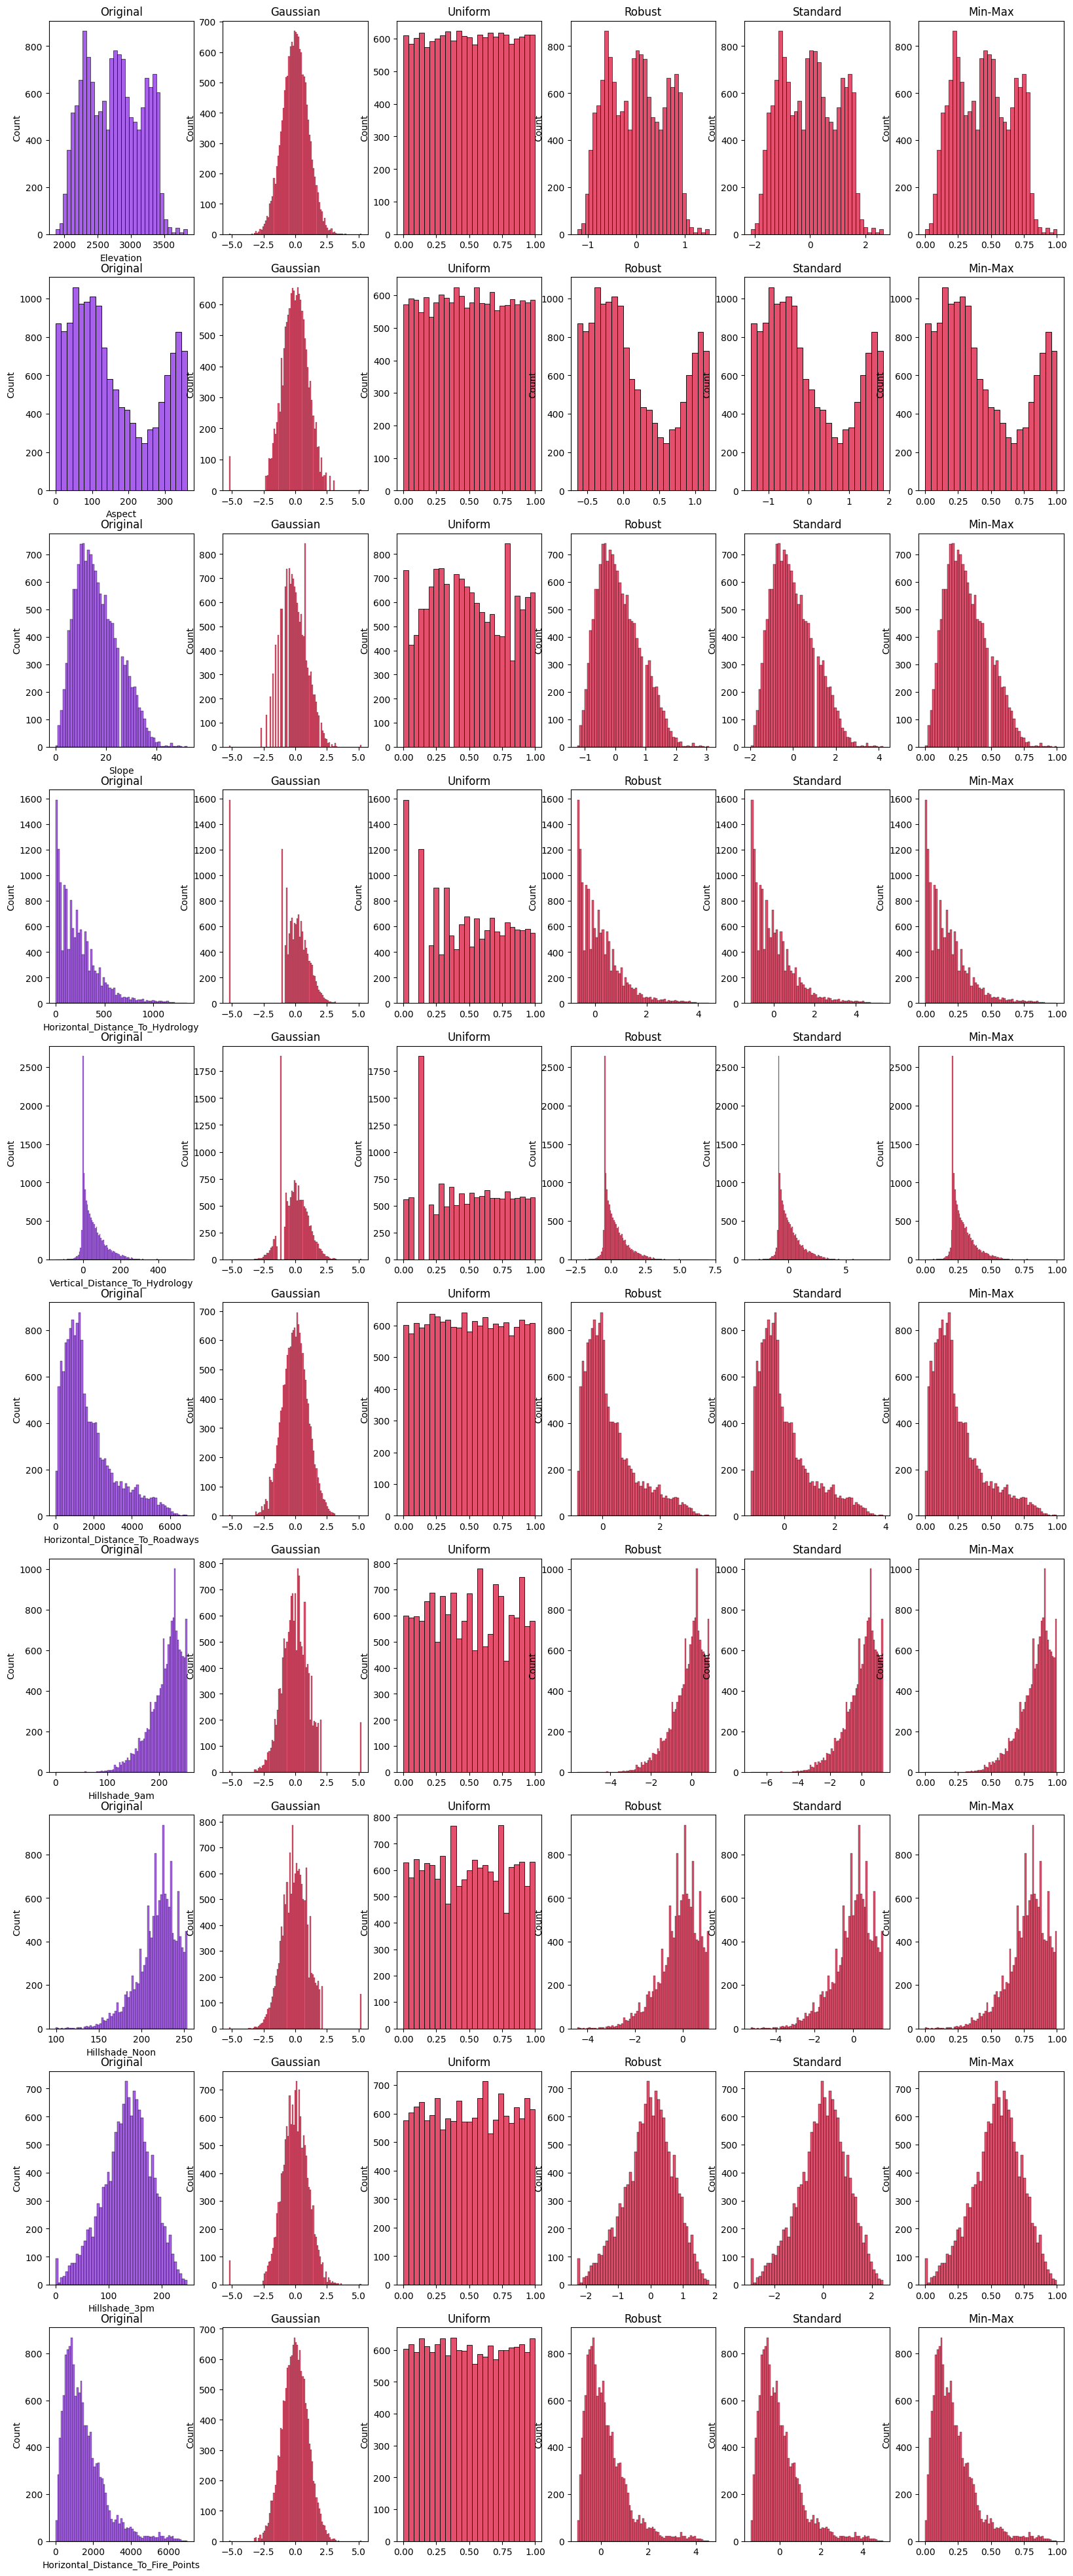

In [69]:
fig, axes = plt.subplots(nrows=len(numericals), ncols=1+len(scalers), figsize=(20, 5*len(numericals)))
for i in range(len(numericals)):
    col = numericals[i]
    sns.histplot(x=col, data=x, ax=axes[i,0], color="blueviolet")
    axes[i,0].set_title("Original")
    for j in range(len(scalers)):
        scaler = scalers[j]
        reshaped_col = np.expand_dims(x[col], axis=1)
        transformed_col = scaler.fit_transform(reshaped_col)
        sns.histplot(x=transformed_col[:,0], ax=axes[i,j+1], color="crimson")
        axes[i,j+1].set_title(names[j])
plt.show()

* Min-Max Scaling은 모든 특성이 [0, 1]의 값을 갖도록 만듭니다. 최소값을 뺀 다음 최대값으로 나누면 됩니다.

* Standardization은 평균을 뺀 다음 표준편차로 나눕니다. 이렇게 하면 모든 기능의 평균이 0이고 표준 편차가 1이 됩니다.

* Robust Scaler는 Standardization와 동일하지만 평균과 표준 편차를 사용하는 대신 중앙값과 25번째 백분위수와 75번째 백분위수 사이의 범위인 IQR을 사용합니다. 이렇게 하면 값의 중앙 50%의 범위가 1이고 중앙값이 0이 됩니다. 이렇게 하면 중앙 50%가 -0.5에서 0.5 사이에 있게 됩니다. 원하는 경우 다른 백분위수를 사용할 수 있습니다.

* 균일 분위수 변환기는 분포를 0에서 1 사이의 균일 분포로 변환합니다.

* 정규/가우스 분위수 변환기는 분포를 평균이 0이고 표준 편차가 1인 가우스 분포로 변환합니다.

**Note**
* **StandardScaler, Min-Max Scaler 및 RobustScaler는 "선형 변환"입니다. 분포의 모양은 바뀌지 않습니다.**
* 예를 들어 대부분의 값이 [0.2 , 0.5] 사이에 매핑되기 때문에 **최소-최대 스케일링**은 **매우 편향된 특성에 적합하지 않습니다.**
* **표준 스케일러**는 이상치의 영향을 받는 평균과 표준을 사용하기 때문에 **편향된 특성에도 적합하지 않을 수 있습니다.**
* **Robust Scaler**는 **이상값의 영향을 받지 않으므로 편향된 분포에 더 적합합니다.**
* **균일 및 가우스 변환**은 기능 간의 종속성을 왜곡할 수 있습니다. 원래 종속되어 있던 기능은 덜 종속적이 될 수 있으며 그 반대의 경우도 마찬가지입니다. 따라서 기능 간의 **상관관계/종속성이 높으면 이 두 가지가 적합하지 않을 수 있습니다.** 그러나 그렇지 않은 경우 많은 방법/모델이 정규/균일 분포에서 더 잘 작동할 수 있으므로 더 나은 결과를 제공할 수 있습니다.

In [70]:
rs = RobustScaler(quantile_range=(5,95))
scaled_data = rs.fit_transform(x)

## MICE: Multiple/Multivariate Imputation by Chained Equations

MICE는 기계학습을 통해 결측값을 추정하는 데 사용되는 방법이다.   

[참고](https://www.youtube.com/watch?v=WPiYOS3qK70)

In [71]:
xcopy = x.copy(deep=True)
xcopy.drop(probably_useless_features, axis=1, inplace=True)

In [72]:
xcopy = xcopy.sample(n=3000, axis=0)

In [73]:
for col in xcopy.columns:
    for i in xcopy.index:
        r = np.random.rand()
        if r < 0.05:
            xcopy.loc[i,col] = np.nan

In [74]:
xcopy.shape

(3000, 40)

In [75]:
xcopy.isna().sum()

Elevation                             158
Aspect                                150
Slope                                 139
Horizontal_Distance_To_Hydrology      156
Vertical_Distance_To_Hydrology        153
Horizontal_Distance_To_Roadways       139
Hillshade_9am                         161
Hillshade_Noon                        144
Hillshade_3pm                         143
Horizontal_Distance_To_Fire_Points    159
Wilderness_Area1                      140
Wilderness_Area2                      138
Wilderness_Area3                      157
Wilderness_Area4                      157
Soil_Type1                            142
Soil_Type2                            147
Soil_Type3                            138
Soil_Type4                            148
Soil_Type5                            133
Soil_Type6                            145
Soil_Type10                           151
Soil_Type11                           160
Soil_Type12                           160
Soil_Type13                       

In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [77]:
from sklearn.tree import DecisionTreeRegressor
# 깊이가 5인 결정 트리생성
tree = DecisionTreeRegressor(max_depth = 5)

In [78]:

mice = IterativeImputer(estimator=tree, n_nearest_features=10)

In [79]:
impdata = mice.fit_transform(xcopy)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [80]:
impdataframe = pd.DataFrame(impdata, columns=xcopy.columns)

In [81]:
impdataframe.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type10                           0
Soil_Type11                           0
Soil_Type12                           0
Soil_Type13                           0
Soil_Type14                           0


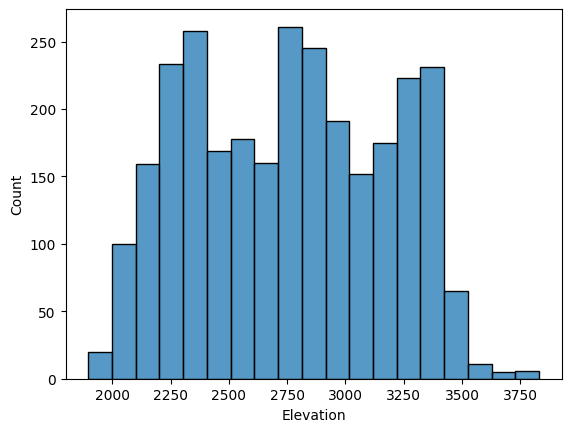

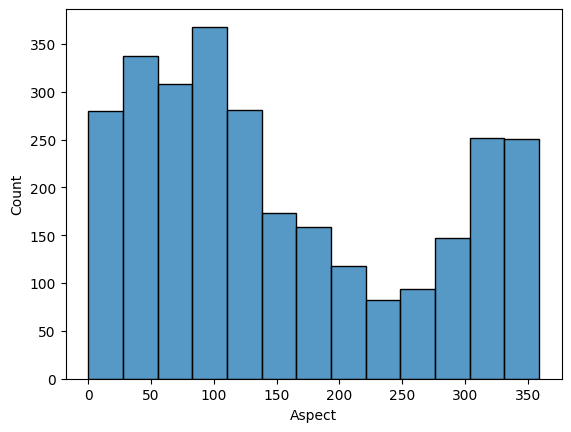

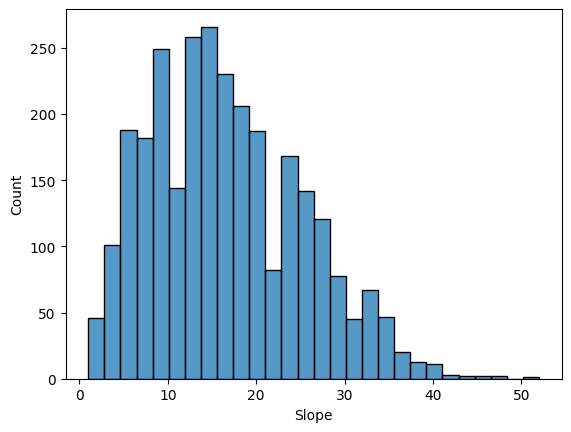

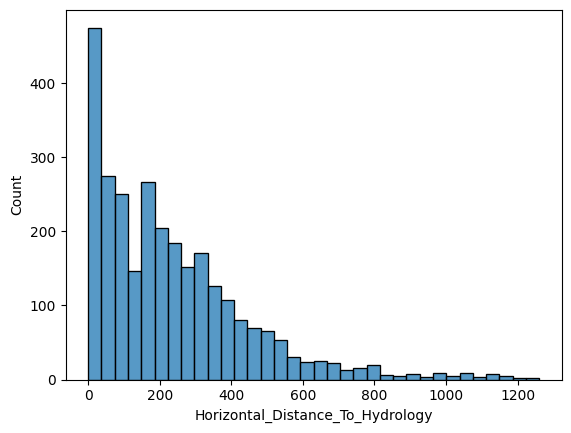

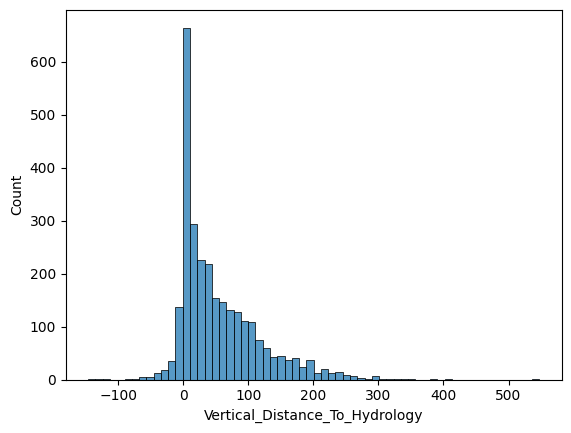

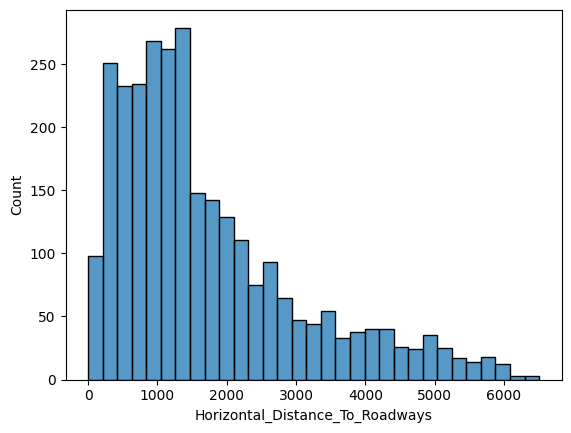

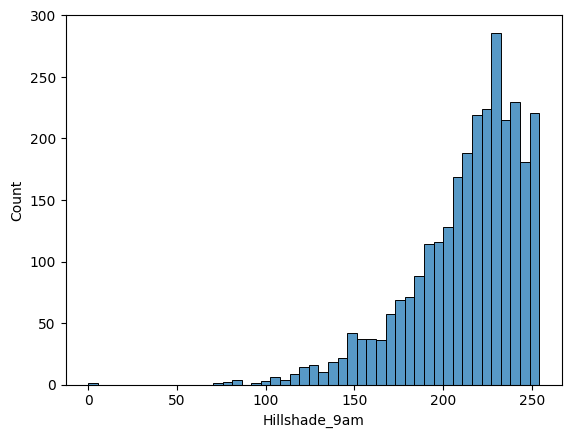

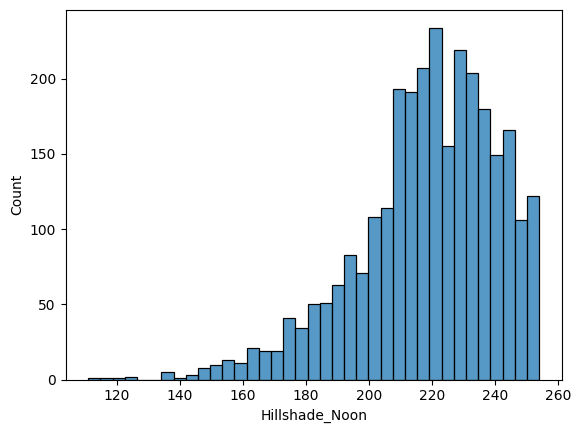

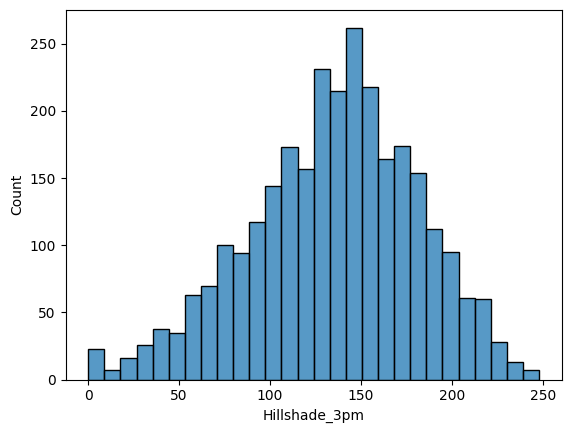

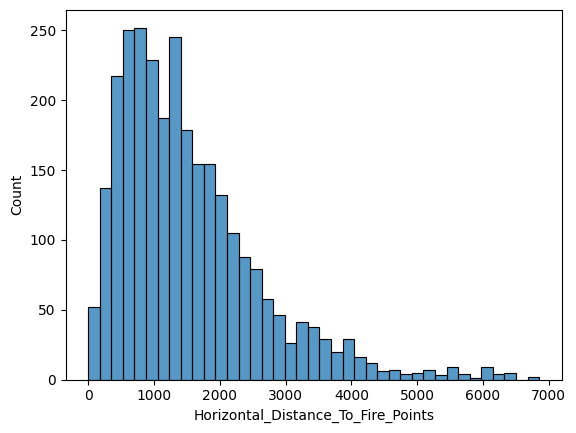

In [82]:
for col in numericals:
    sns.histplot(xcopy[col])
    plt.show()

## (Extremely) Basic Exploration & Processing

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("fivethirtyeight")

In [84]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [86]:
data.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [88]:
x

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,0


In [89]:
y

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=23)

In [92]:
categoricals = []
numericals = []
for col in x.columns:
    if col[:9]=="Soil_Type" or col[:15]=='Wilderness_Area':
        categoricals.append(col)
    else:
        numericals.append(col)

In [93]:
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()

In [94]:
xtrain

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
5656,3321,354,15,60,12,4414,193,212,156,4002,...,0,0,0,0,0,0,0,1,0,0
13697,2646,49,13,283,110,433,225,211,118,1456,...,0,0,0,0,0,0,0,0,0,0
1612,2727,93,33,150,78,150,250,170,21,2565,...,0,0,0,0,0,0,0,0,0,0
4078,2215,193,12,0,0,1110,219,249,163,450,...,0,0,0,0,0,0,0,0,0,0
14459,3051,48,13,618,231,391,224,211,119,960,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190,2502,150,25,228,-47,1318,243,230,101,1266,...,0,0,0,0,0,0,0,0,0,0
10185,3400,125,14,900,190,771,242,230,113,108,...,0,0,0,0,0,0,0,1,0,0
9256,3337,339,13,495,82,3394,191,221,168,3404,...,0,0,0,0,0,0,0,0,0,1
13030,2409,53,10,85,22,981,226,218,126,1266,...,0,0,0,0,0,0,0,0,0,0


In [95]:
xtrain[numericals] = ss.fit_transform(xtrain[numericals])
xtest[numericals] = ss.transform(xtest[numericals])

In [96]:
xtrain.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
5656,0.779452,1.163265,0.000000,-0.466926,-0.283784,2.059136,-0.692308,-0.357143,0.295082,2.174188,...,0,0,0,0,0,0,0,1,0,0
13697,-0.145205,-0.392857,-0.166667,0.400778,1.040541,-0.586047,0.128205,-0.392857,-0.327869,0.158353,...,0,0,0,0,0,0,0,0,0,0
1612,-0.034247,-0.168367,1.500000,-0.116732,0.608108,-0.774086,0.769231,-1.857143,-1.918033,1.036421,...,0,0,0,0,0,0,0,0,0,0
4078,-0.735616,0.341837,-0.250000,-0.700389,-0.445946,-0.136213,-0.025641,0.964286,0.409836,-0.638163,...,0,0,0,0,0,0,0,0,0,0
14459,0.409589,-0.397959,-0.166667,1.704280,2.675676,-0.613953,0.102564,-0.392857,-0.311475,-0.234363,...,0,0,1,0,0,0,0,0,0,0


In [97]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=12)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=12)

In [98]:
from sklearn.metrics import classification_report

In [99]:
y_pred_tr = tree.predict(xtrain)
y_pred_ts = tree.predict(xtest)

In [100]:
print("Training Results:\n")
print(classification_report(ytrain, y_pred_tr))
print("\nTesting Results:\n")
print(classification_report(ytest, y_pred_ts))

Training Results:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1928
           2       1.00      1.00      1.00      1952
           3       1.00      1.00      1.00      1903
           4       1.00      1.00      1.00      1960
           5       1.00      1.00      1.00      1947
           6       1.00      1.00      1.00      1956
           7       1.00      1.00      1.00      1962

    accuracy                           1.00     13608
   macro avg       1.00      1.00      1.00     13608
weighted avg       1.00      1.00      1.00     13608


Testing Results:

              precision    recall  f1-score   support

           1       0.72      0.64      0.68       232
           2       0.62      0.63      0.63       208
           3       0.81      0.66      0.73       257
           4       0.88      0.94      0.91       200
           5       0.82      0.92      0.87       213
           6       0.70      0.78      0

## Cross-Validation
![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
cvscore = cross_val_score(tree, xtrain, ytrain, cv=10, scoring='accuracy')
cvscore

array([0.7817781 , 0.77516532, 0.79353417, 0.78104335, 0.77149155,
       0.80529023, 0.77443057, 0.79500367, 0.78235294, 0.79632353])

In [106]:
print('평균 검증 정확도:', cvscore.mean())

평균 검증 정확도: 0.7856413428707265


In [104]:
cvscore.std()

0.010642662412011

## Stratified Cross-Validation
![](https://dataaspirant.com/wp-content/uploads/2020/12/8-Stratified-K-Fold-Cross-Validation.png)

일반적으로 회귀에는 기본 k-겹 교차검증을 사용하고, 분류에는 StratifiedKFold를 사용

In [107]:
from sklearn.model_selection import StratifiedKFold

In [108]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

cvscore = cross_val_score(tree, xtrain, ytrain, cv=skf, scoring='accuracy')
cvscore

array([0.80382072, 0.76855253, 0.78912564, 0.76781778, 0.79426892,
       0.77002204, 0.77663483, 0.79647318, 0.78382353, 0.78970588])

In [109]:
print('평균 검증 정확도:', cvscore.mean())

평균 검증 정확도: 0.7840245062021871


In [110]:
cvscore.std()

0.012094890700370082

<Axes: xlabel='Cover_Type', ylabel='count'>

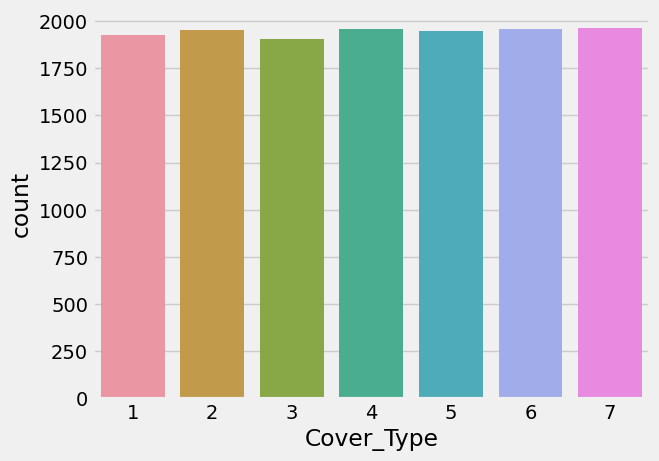

In [111]:
sns.countplot(x=ytrain)

## Grid Search

Grid search (격자 탐색) 은 모델 하이퍼 파라미터에 넣을 수 있는 값들을

순차적으로 입력한뒤에 가장 높은 성능을 보이는 하이퍼 파라미터들을 찾는 탐색 방법

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
hyperparameters = {"max_depth":(5, 15, 30, 50, 65, 80), "max_features":(0.2, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}

In [114]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

#opt = GridSearchCV(tree, hyperparameters, cv=10, n_jobs=-1)

opt = GridSearchCV(estimator=tree, param_grid=hyperparameters, cv=skf, scoring="accuracy", n_jobs=-1)

In [115]:
opt.fit(xtrain, ytrain)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=12), n_jobs=-1,
             param_grid={'max_depth': (5, 15, 30, 50, 65, 80),
                         'max_features': (0.2, 0.4, 0.6, 0.8),
                         'min_samples_split': (2, 5, 8, 10, 20)},
             scoring='accuracy')

In [117]:
opt.best_estimator_

DecisionTreeClassifier(max_depth=30, max_features=0.8, min_samples_split=5,
                       random_state=12)

In [118]:
opt.best_score_

0.7860824112892769

In [119]:
opt.best_params_

{'max_depth': 30, 'max_features': 0.8, 'min_samples_split': 5}

In [120]:
pd.DataFrame(opt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060533,0.017408,0.010272,0.004995,5,0.2,2,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.439383,0.508450,...,0.440118,0.448935,0.442322,0.445261,0.451874,0.421324,0.432353,0.446720,0.022144,117
1,0.054316,0.010770,0.009552,0.004966,5,0.2,5,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.439383,0.508450,...,0.440118,0.448935,0.442322,0.445261,0.451874,0.421324,0.432353,0.446720,0.022144,117
2,0.047542,0.013663,0.007677,0.005476,5,0.2,8,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.439383,0.508450,...,0.440118,0.448935,0.442322,0.445261,0.451139,0.421324,0.432353,0.446646,0.022127,119
3,0.048946,0.012106,0.008757,0.004916,5,0.2,10,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.439383,0.508450,...,0.440118,0.448935,0.442322,0.445261,0.451139,0.421324,0.432353,0.446646,0.022127,119
4,0.040861,0.015061,0.005619,0.001969,5,0.2,20,"{'max_depth': 5, 'max_features': 0.2, 'min_sam...",0.437913,0.508450,...,0.441587,0.448200,0.442322,0.445261,0.451874,0.422059,0.432353,0.446793,0.022038,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.299465,0.049165,0.006531,0.003499,80,0.8,2,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.795004,0.778104,...,0.767083,0.775900,0.784717,0.771492,0.800147,0.793382,0.772794,0.782481,0.010586,9
116,0.298512,0.041499,0.007942,0.003759,80,0.8,5,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.792065,0.786921,...,0.772226,0.786187,0.789860,0.769287,0.783982,0.788971,0.777206,0.783289,0.007337,6
117,0.295095,0.071538,0.009902,0.004915,80,0.8,8,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.790595,0.795738,...,0.767818,0.760470,0.794269,0.785452,0.785452,0.781618,0.777941,0.782407,0.010602,12
118,0.400051,0.137245,0.010771,0.005171,80,0.8,10,"{'max_depth': 80, 'max_features': 0.8, 'min_sa...",0.808964,0.770022,...,0.780309,0.788391,0.781043,0.775165,0.783982,0.780882,0.772059,0.781231,0.010818,19


In [121]:
all_results = pd.DataFrame(opt.cv_results_)
all_results[(all_results["param_max_depth"]==15) & (all_results["param_max_features"]==0.8) & (all_results["param_min_samples_split"]==2)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
35,0.486508,0.049454,0.012373,0.00301,15,0.8,2,"{'max_depth': 15, 'max_features': 0.8, 'min_sa...",0.800882,0.783982,...,0.771492,0.772961,0.787656,0.800147,0.797943,0.769853,0.783824,0.784831,0.011156,2


## Randomized Search

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FM1AVC%2Fbtq9lUcQiLr%2FE090GudodFaOOBxWCfhr81%2Fimg.png)   
* GridSearchCV: 검증하고 싶은 하이퍼파라미터들의 수치를 정해주고 그 조합을 모두 검증.
* RandomizedSearchCV: 검증하려는 하이퍼파라미터들의 값 범위를 지정해주면 무작위로 값을 지정해 그 조합을 모두 검증.

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
hyperparameters = {"max_depth":(5, 15, 30, 50, 65, 80), "max_features":(0.2, 0.1, 0.4, 0.6, 0.8), "min_samples_split":(2, 5, 8, 10, 20)}

In [123]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

In [124]:
opt = RandomizedSearchCV(estimator=tree, param_distributions=hyperparameters, n_iter=50, cv=skf, scoring="accuracy", n_jobs=-1)

In [125]:
opt.fit(xtrain, ytrain)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=15, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=12), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': (5, 15, 30, 50, 65, 80),
                                        'max_features': (0.2, 0.1, 0.4, 0.6,
                                                         0.8),
                                        'min_samples_split': (2, 5, 8, 10, 20)},
                   scoring='accuracy')

In [126]:
opt.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features=0.8, random_state=12)

In [127]:
opt.best_score_

0.7848312767428793

In [128]:
opt.best_params_

{'min_samples_split': 2, 'max_features': 0.8, 'max_depth': 15}

In [129]:
all_results = pd.DataFrame(opt.cv_results_)
all_results[(all_results["param_max_depth"]==15) & (all_results["param_max_features"]==0.8) & (all_results["param_min_samples_split"]==2)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
10,0.187809,0.016106,0.005739,0.002568,2,0.8,15,"{'min_samples_split': 2, 'max_features': 0.8, ...",0.800882,0.783982,...,0.771492,0.772961,0.787656,0.800147,0.797943,0.769853,0.783824,0.784831,0.011156,1
